<a href="https://colab.research.google.com/github/Haooo517/Generation_AI/blob/main/NTNU_41147006S_%E8%B3%87%E5%B7%A5115_%E5%BC%B5%E8%A8%93%E8%B1%AA_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 實作 Reflection AI Agent

#### Step 0. 一樣先引入老師的基本四件套

In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1. 機器人主題設計

這次設計一個詩意文字煉金師 <br>
並且採用 writer 和 reviewer 的 reflection 模式 <br>
讓 writer 負責詩化使用者輸入的任何文字 <br>
再經由 reviewer 進一步潤稿 <br>
讓任何平淡無奇的文字都能變得詩意盎然

#### Step 2. 設定 Open AI

先引入需要的模組

In [27]:
import os
from google.colab import userdata

接著讀入之前申請過的 Groq API key

In [28]:
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "llama3-70b-8192"

#### Step 3. 使用 AI Suite

將 AI Suite 下載下來

In [29]:
!pip install aisuite[all]

然後就可以 import <br>
並設定好 writer 和 reviewer 的 model

In [30]:
import aisuite as ai

provider_writer = "groq"
model_writer="llama3-70b-8192"

provider_reviewer = "groq"
model_reviewer = "llama3-70b-8192"

接著設計一個標準回應函式

In [31]:
def reply(
    system_prompt="請用台灣習慣的中文回覆。",
    user_prompt="hi",
    provider="groq",
    model="llama3-70b-8192"
):
    try:
        client = ai.Client()

        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]

        response = client.chat.completions.create(
            model=f"{provider}:{model}",
            messages=messages
        )

        return response.choices[0].message.content

    except Exception as e:
        return f"⚠️ 發生錯誤：{str(e)}"

####  Step 4. 設定 writer 和 reviewer

根據剛剛決定好的設定 <br>
可以分別把他們的角色設定好

In [32]:
system_writer = "你是一位詩意文字煉金師，擅長將使用者任何輸入（無論是情緒、日常、碎念），轉化為具有詩意、自然意象、感官描寫的段落。請用台灣習慣的中文，讓文字有韻味與流動感。"
system_reviewer = "你是一位詩意潤稿導師，擅長讓文字更有節奏與畫面感。請針對以下段落給出具體建議，讓它更像一首自由詩，但仍然保有人類日常情感的共鳴。請用台灣習慣的中文。"

接著再設計一個函式 <br>
呼叫剛剛的 reply 函式 <br>
讓機器人會根據 writer 和 reviewer 產生出兩個不同版本的回答 <br>
同時中間 reviewer 給予的 suggestion 也可以一起產生

In [33]:
def reflect_post(prompt):
    first_version = reply(system_prompt=system_writer, user_prompt=prompt,
                      provider=provider_writer, model=model_writer)

    suggestion = reply(system_prompt=system_reviewer, user_prompt=first_version,
                    provider=provider_reviewer, model=model_reviewer)

    second_prompt = f"這是我剛剛寫的貼文：\n{first_version}\n\n這是修改建議：\n{suggestion}\n\n請根據這些建議，幫我改得更生活化、更自然。請用台灣習慣的中文, 並且只要輸出改好的文章就可以了。"

    second_version = reply(system_prompt=system_writer, user_prompt=second_prompt,
                        provider=provider_writer, model=model_reviewer)

    return first_version, suggestion, second_version

### Step 5. 用 Gradio 測試

先下載 gradio

In [34]:
!pip install gradio

之後就可以 import <br>
並且做一些介面上的設定 <br>
然後放上三個 Textbox 來顯示兩個版本的回答和 suggestion <br>
最後就可以打開測試看看了

In [35]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("""
    # 🌸 詩化日常 AI（Reflection Agent）
    把你隨手寫的字，變成一首自由詩。
    無論是抱怨、心情、對話，AI 都能煉成詩。
    """)

    user_input = gr.Textbox(label="📝 請輸入一段日常話語（心情、廢話都可以）", lines=3, placeholder="例如：今天好累，只想發呆。")

    btn = gr.Button("🎭 開始詩化 & 潤飾")

    with gr.Row():
        out1 = gr.Textbox(label="🪄 第一版詩文（詩意煉金師）", lines=5)
        out2 = gr.Textbox(label="🔍 詩意建議（文藝導師）", lines=5)
        out3 = gr.Textbox(label="🌷 詩化完成版（優化後）", lines=5)

    btn.click(reflect_post, inputs=[user_input], outputs=[out1, out2, out3])

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://69118c9f2cedd7bacf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://69118c9f2cedd7bacf.gradio.live


簡單的測試結果如下

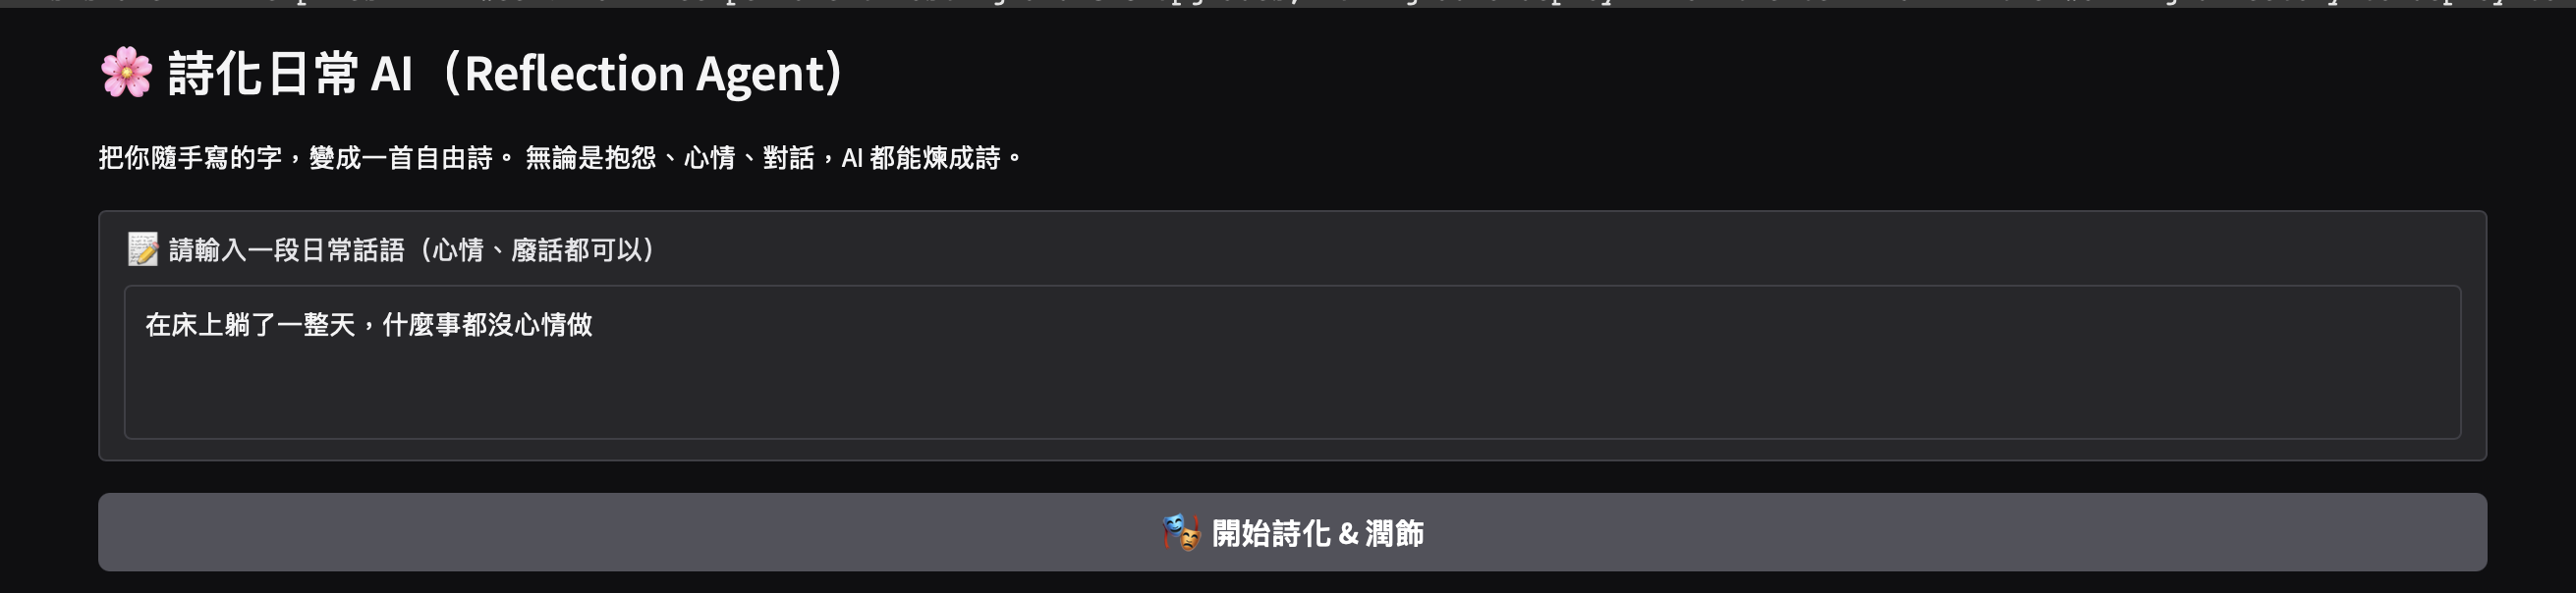

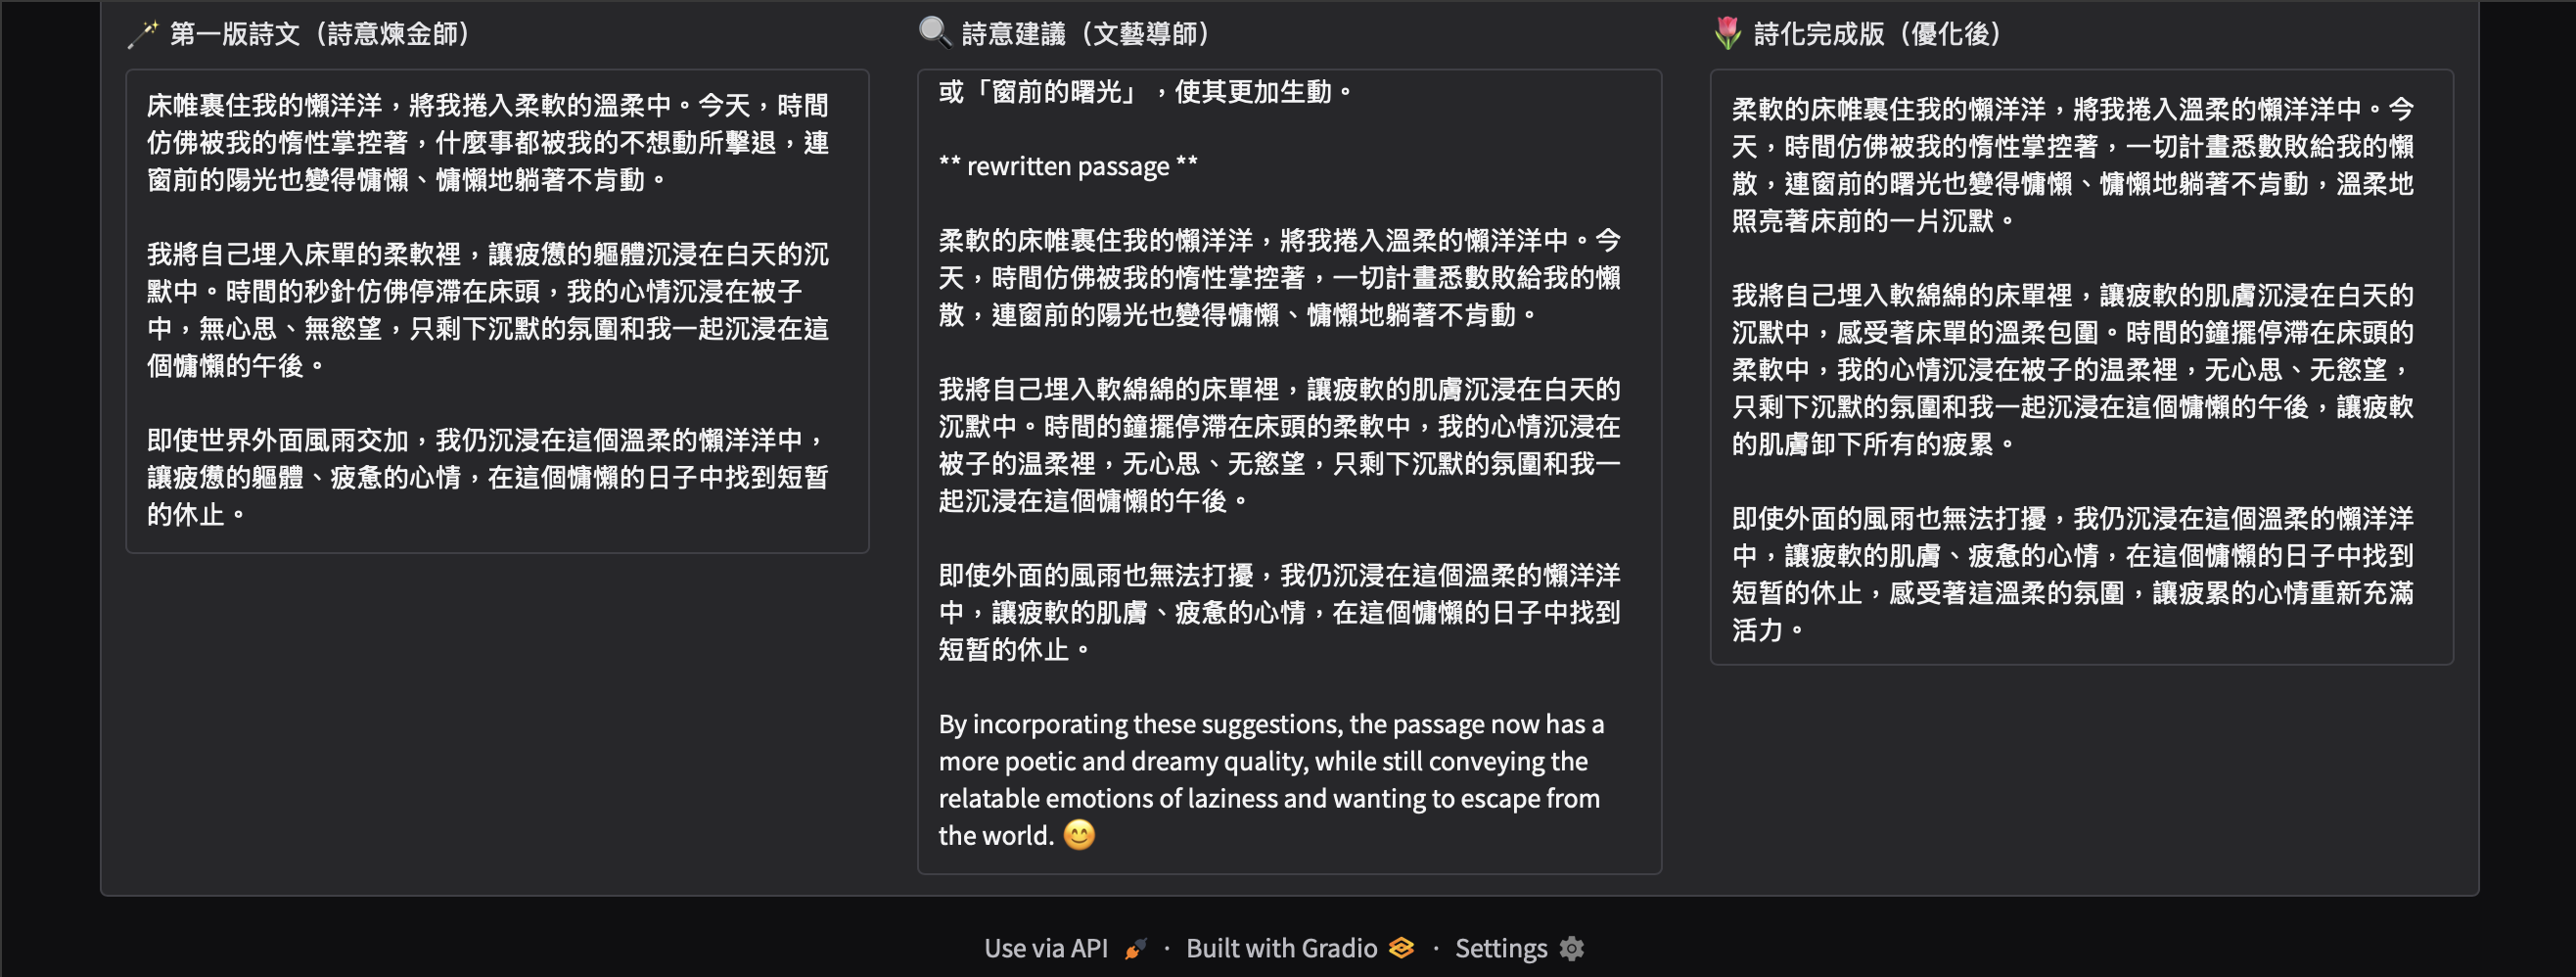

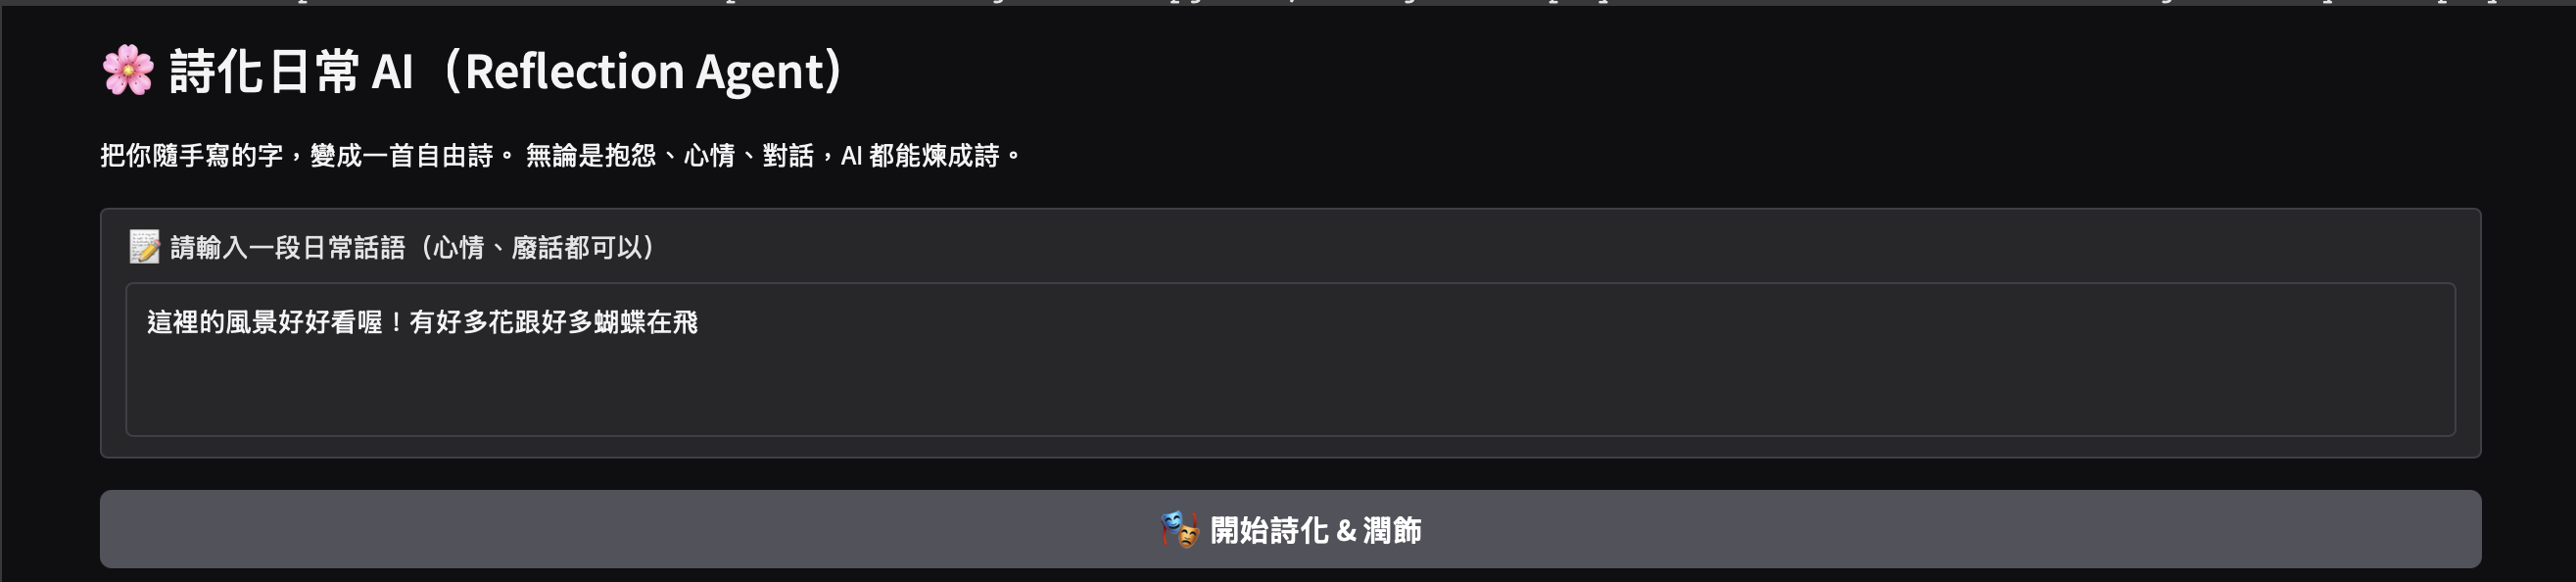

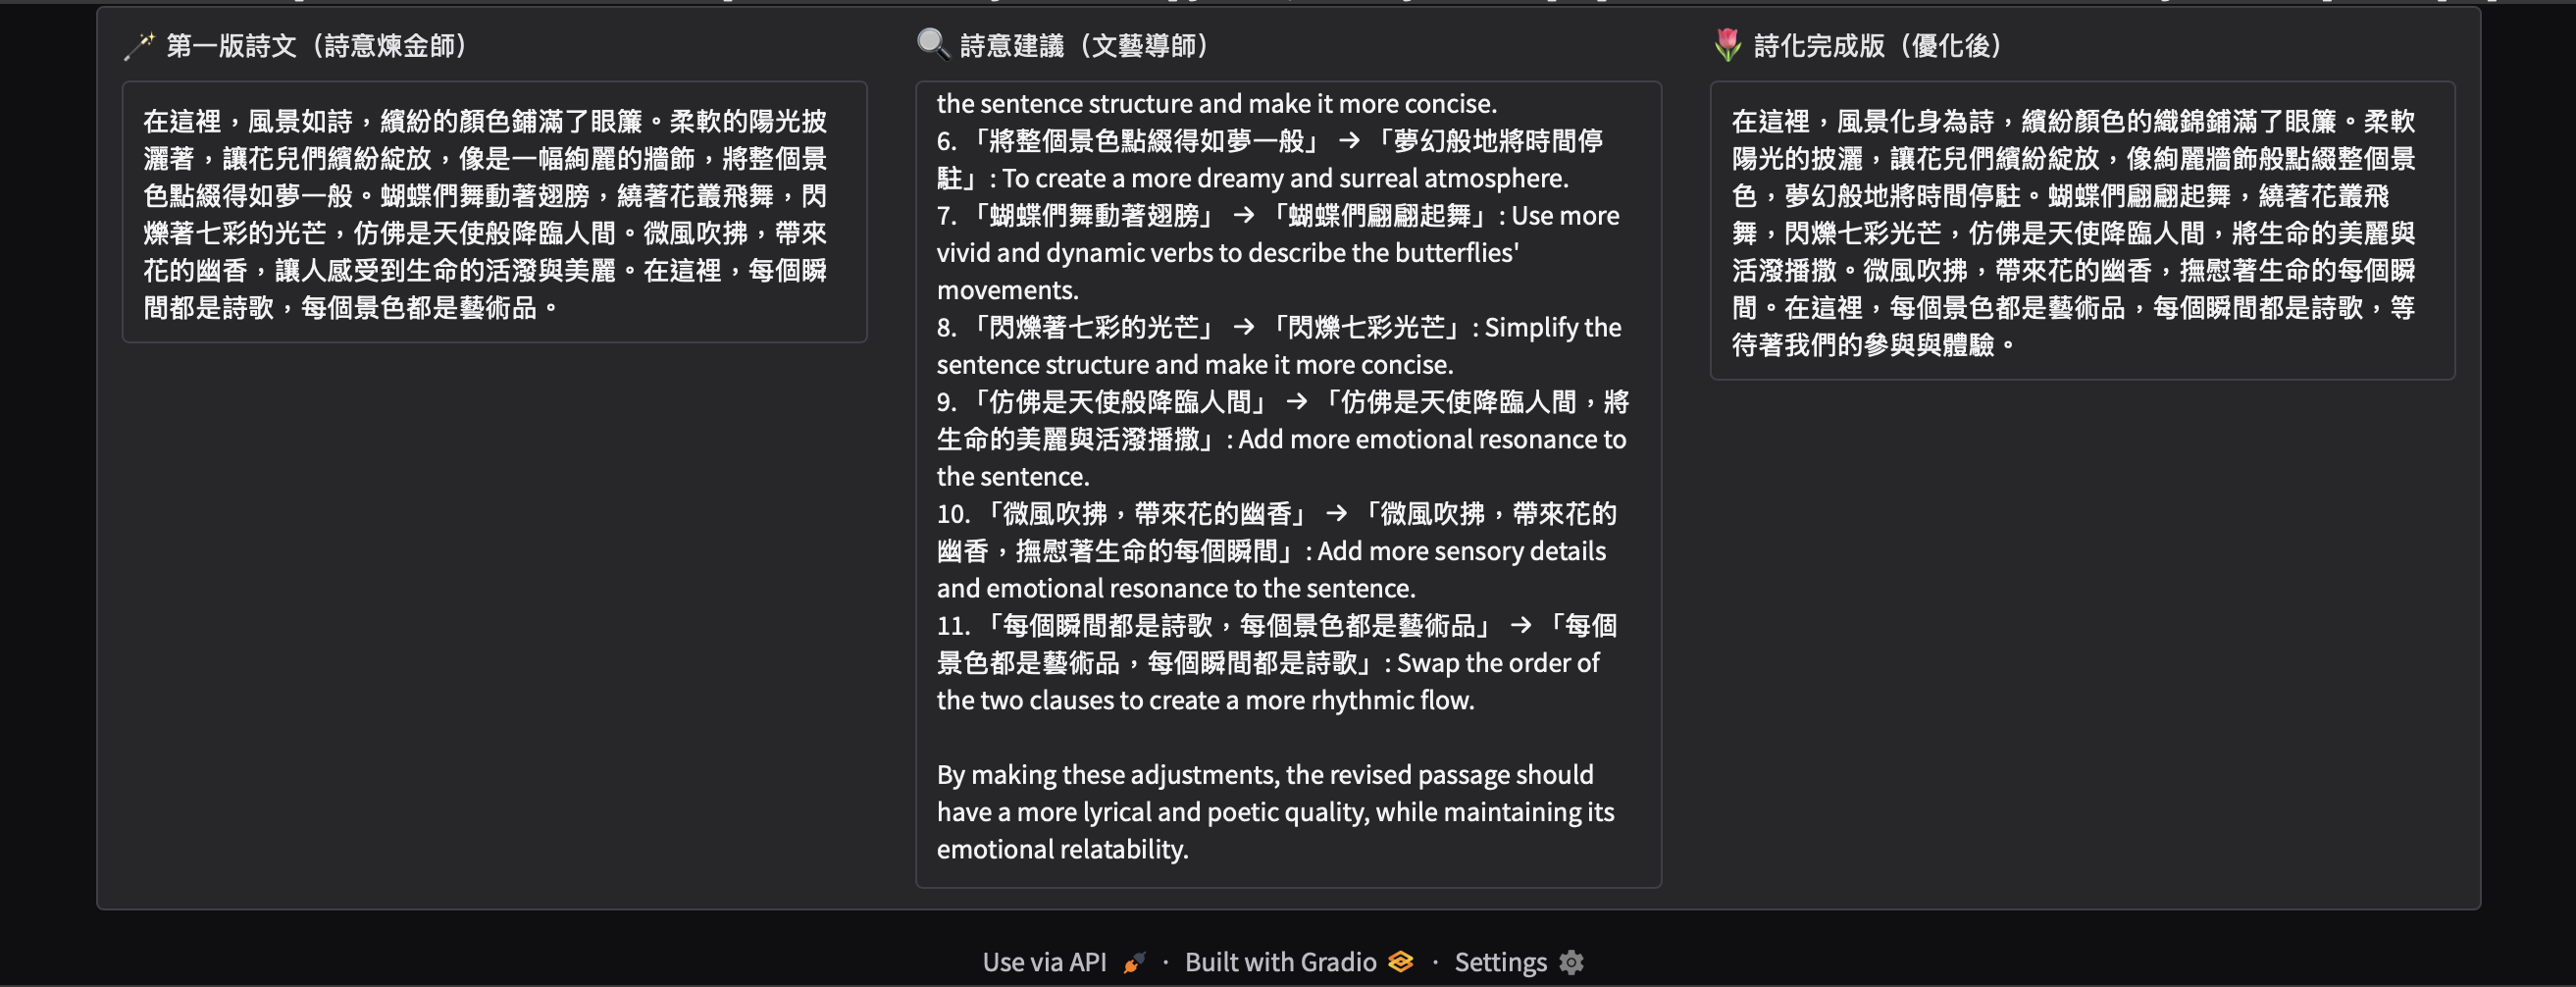

不難發現他不只能把平淡的句子變得很有意境 <br>
也能把原本沒有任何形容的景色變得栩栩如生 <br>
看來 AI 的文學素養是真的很好 <br>
這次的機器人設計可以說是大成功！